In [62]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
df = pd.read_csv('data/ad.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [156]:
def dim_known(x):
    if x.strip() != '?':
        return 1
    else:
        return 0
    
def fix_dim(x):
    if x.strip() != '?':
        return float(x.strip())
    else:
        return 0

In [157]:
df['dim_known']=df[2].apply(dim_known)
df[0] = df[0].apply(fix_dim)
df[1] = df[1].apply(fix_dim)
df[2] = df[2].apply(fix_dim)

In [158]:
def fix(x):
    if x==1 or x=='1' or x=='?':
        return 1
    else:
        return 0

In [159]:
df[3] = df[3].apply(fix)

In [160]:
Y = (df[1558]=='ad.').apply(int)
X = df.drop(1558, axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [162]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,dim_known
1574,50.0,75.0,1.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2343,138.0,200.0,1.4492,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2923,24.0,120.0,5.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
638,100.0,100.0,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016,24.0,24.0,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [163]:
d_train = X_train[[0,1,2,'dim_known']]
p_train = X_train.drop([0,1,2,'dim_known'], axis=1)

In [164]:
pca = PCA(n_components=6)
pca.fit(p_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
p_train = pd.DataFrame(pca.transform(p_train))

In [166]:
len(p_train)

2459

In [167]:
d_train = pd.DataFrame(np.array(d_train))
d_train.head()

,0,1,2,3
0,50.0,75.0,1.5000,1.0
1,138.0,200.0,1.4492,1.0
2,24.0,120.0,5.0000,1.0
3,100.0,100.0,1.0000,1.0
4,24.0,24.0,1.0000,1.0


In [168]:
X_train = pd.concat([d_train, pd.DataFrame(p_train)], axis=1)

In [169]:
X_train.head()

,0,1,2,3,0,1,2,3,4,5
0,50.0,75.0,1.5000,1.0,-0.473336,-0.267794,-0.239733,-0.010316,-0.269126,0.076543
1,138.0,200.0,1.4492,1.0,-0.437391,-0.188393,-0.181136,-0.006043,-0.186494,0.052446
2,24.0,120.0,5.0000,1.0,-0.447068,-0.179648,0.262481,-0.138199,0.222286,-0.361882
3,100.0,100.0,1.0000,1.0,-0.553846,-0.206395,-0.482622,-0.052326,0.790240,-0.222402
4,24.0,24.0,1.0000,1.0,-0.504379,-0.145335,-0.334824,-0.045220,0.523985,-0.137924


In [170]:
y_train = np.array(y_train)

In [171]:
d_test = X_test[[0,1,2,'dim_known']]
p_test = X_test.drop([0,1,2,'dim_known'], axis=1)
p_test = pd.DataFrame(pca.transform(p_test))
d_test = pd.DataFrame(np.array(d_test))
X_test = pd.concat([d_test, p_test], axis=1)
y_test = np.array(y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8096           0.0036           16.60s
         2           0.8306           0.0035           17.82s
         3           0.7960           0.0038           18.17s
         4           0.7731           0.0040           18.13s
         5           0.8147           0.0036           18.12s
         6           0.7694           0.0034           18.20s
         7           0.7802           0.0033           18.19s
         8           0.7903           0.0037           18.10s
         9           0.8041           0.0032           18.09s
        10           0.7960           0.0028           18.13s
        20           0.7218           0.0025           16.73s
        30           0.7422           0.0024           16.36s
        40           0.6992           0.0021           17.23s
        50           0.6715           0.0020           17.13s
        60           0.6792           0.0019           16.85s
       

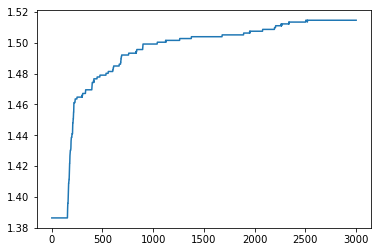

In [173]:
N = 3000
l = 10/N
model = GradientBoostingClassifier(learning_rate=l, n_estimators=N, subsample=0.5, min_samples_split=10, 
                                   max_depth=3, max_features=4, verbose=1)
model.fit(X_train, y_train)
print model.score(X_test,y_test)

test_score = np.zeros(N)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test.reshape(-1,1), y_pred.reshape(-1,1))

x_axis=np.linspace(1,N,N)
y_axis=np.array(test_score)
plt.plot(x_axis, y_axis)
plt.show()

In [180]:
pd.concat([pd.DataFrame(model.predict(X_test)), pd.DataFrame(y_test)], axis=1).sample(20)

,0,0
246,0,0
373,0,0
770,0,0
595,0,0
367,0,0
407,0,0
599,0,0
504,0,0
187,0,0
803,0,0
